In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from sqlalchemy import create_engine
from sqlalchemy import URL
from sqlalchemy import text
from urllib.parse import quote_plus

In [4]:
url_object = URL.create(
    "mysql+mysqlconnector",
    username="root",
    password="",
    host="localhost"
    )
engin = create_engine(url_object)
query = ("SELECT * FROM EPA_Fuel_Economy;") 

In [5]:
with engin.connect() as conn:
    conn.execute(text("USE dataVisualization"))
    data = pd.read_sql(text(query), conn)

In [6]:
data.head(10)

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
5,BMW,Z3 Roadster,2000,6.0,Automatic 4-spd,2.5,Two Seaters,-1,17.347895,2500,Premium,24,17,19
6,BMW,Z3 Roadster,2000,6.0,Manual 5-spd,2.5,Two Seaters,-1,16.480500,2350,Premium,25,17,20
7,BMW,Z3 Roadster,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
8,BMW,Z3 Roadster,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
9,BMW,Z8,2000,8.0,Manual 6-spd,4.9,Two Seaters,-1,21.974000,3150,Premium,19,12,15


[Text(0.5, 0, 'Consumption'), Text(0, 0.5, 'Displacement')]

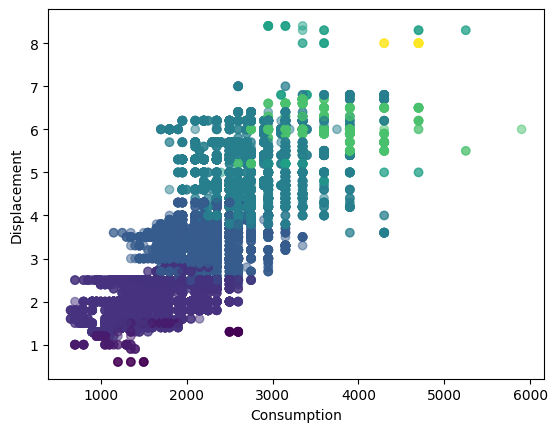

In [16]:
fig, ax = plt.subplots()
ax.scatter(x=data['fuelCost08'], y=data['displ'], alpha=0.5,c=data['cylinders'])
ax.set(xlabel='Consumption', ylabel='Displacement')

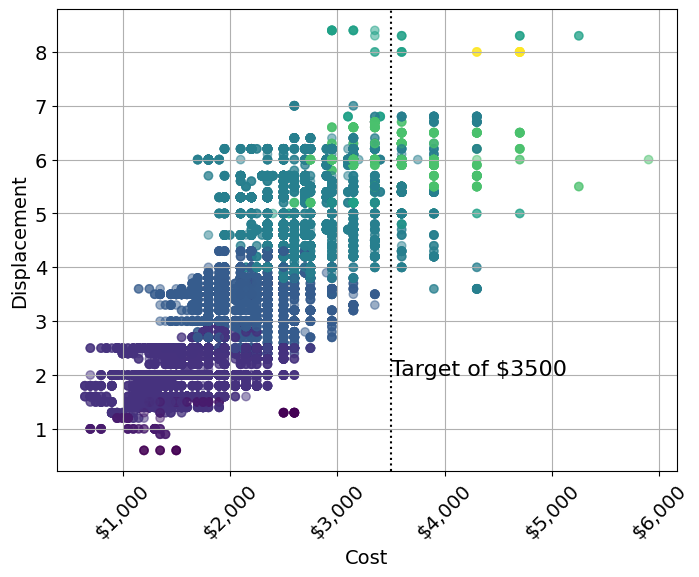

In [38]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.scatter(x=data['fuelCost08'], y=data['displ'], alpha=0.5, c=data['cylinders'])
ax1.set_xlabel('Cost', size=14)
ax1.set_ylabel('Displacement', size=14)
ax1.xaxis.set_major_formatter('${x:,.0f}')
ax1.tick_params(axis='x', labelrotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.axvline(3500, color='black', linestyle=':')
ax1.annotate('Target of $3500', xy=(3500,2), size=16)
ax1.grid(True)

In [26]:
data2 = data.dropna(subset=['cylinders'])

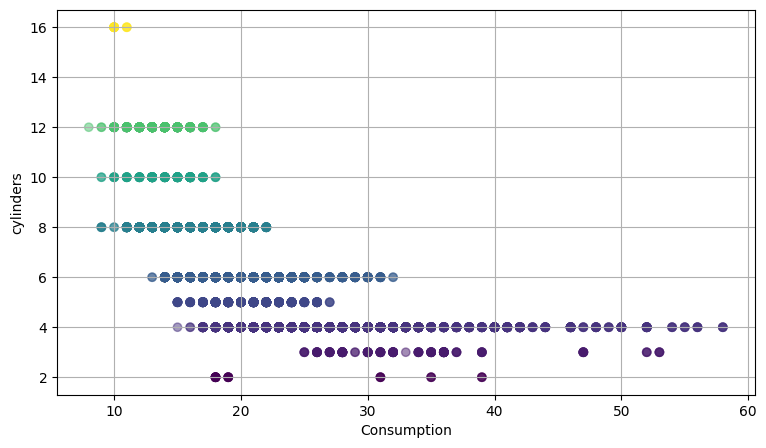

In [39]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x=data2['comb08'], y=data2['cylinders'], alpha=0.5,c=data2['cylinders'])
ax.set(xlabel='Consumption', ylabel='cylinders')
ax.grid(True)

In [33]:
data2[data2['comb08'] >= 55]

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
18827,Toyota,Prius Eco,2016,4.0,Automatic (variable gear ratios),1.8,Midsize Cars,158,5.885893,650,Regular,53,58,56
19720,Toyota,Prius Eco,2017,4.0,Automatic (variable gear ratios),1.8,Midsize Cars,158,5.885893,650,Regular,53,58,56
20141,Hyundai,Ioniq,2017,4.0,Automatic (AM6),1.6,Large Cars,163,5.992909,700,Regular,54,55,55
20142,Hyundai,Ioniq Blue,2017,4.0,Automatic (AM6),1.6,Large Cars,154,5.682931,650,Regular,59,57,58
21270,Hyundai,Ioniq Blue,2018,4.0,Automatic (AM6),1.6,Large Cars,154,5.682931,650,Regular,59,57,58
21271,Hyundai,Ioniq,2018,4.0,Automatic (AM6),1.6,Large Cars,163,5.992909,700,Regular,54,55,55
21409,Toyota,Prius Eco,2018,4.0,Automatic (variable gear ratios),1.8,Midsize Cars,158,5.885893,650,Regular,53,58,56
22187,Hyundai,Ioniq,2019,4.0,Automatic (AM6),1.6,Large Cars,163,5.992909,700,Regular,54,55,55
22188,Hyundai,Ioniq Blue,2019,4.0,Automatic (AM6),1.6,Large Cars,154,5.682931,650,Regular,59,57,58
22815,Toyota,Prius Eco,2019,4.0,Automatic (variable gear ratios),1.8,Midsize Cars,158,5.885893,650,Regular,53,58,56


In [35]:
data2[data2['cylinders'] >= 16]

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
7063,Bugatti,Veyron,2006,16.0,Automatic (S6),8.0,Two Seaters,-1,32.961000,4700,Premium,14,8,10
8404,Bugatti,Veyron,2008,16.0,Automatic (S6),8.0,Two Seaters,-1,32.961000,4700,Premium,14,8,10
11129,Bugatti,Veyron,2010,16.0,Automatic (S7),8.0,Two Seaters,-1,32.961000,4700,Premium,14,8,10
11982,Bugatti,Veyron,2011,16.0,Automatic (S7),8.0,Two Seaters,-1,32.961000,4700,Premium,15,8,10
13354,Bugatti,Veyron,2012,16.0,Automatic (S7),8.0,Two Seaters,-1,32.961000,4700,Premium,15,8,10
14380,Bugatti,Veyron,2013,16.0,Automatic (AM-S7),8.0,Two Seaters,847,32.961000,4700,Premium,15,8,10
15332,Bugatti,Veyron,2014,16.0,Automatic (AM-S7),8.0,Two Seaters,847,32.961000,4700,Premium,15,8,10
16631,Bugatti,Veyron,2015,16.0,Automatic (AM-S7),8.0,Two Seaters,847,32.961000,4700,Premium,15,8,10
20556,Bugatti,Chiron,2018,16.0,Automatic (AM-S7),8.0,Two Seaters,840,29.964545,4300,Premium,14,9,11
22089,Bugatti,Chiron,2019,16.0,Automatic (AM-S7),8.0,Two Seaters,840,29.964545,4300,Premium,14,9,11


In [7]:
avg_by_year = data.groupby(['year'], as_index=False).agg({'comb08': 'mean'}).round(2)
avg_by_year

,year,comb08
0,2000,19.53
1,2001,19.48
2,2002,19.17
3,2003,19.00
4,2004,19.07
5,2005,19.19
6,2006,18.96
7,2007,18.98
8,2008,19.28
9,2009,19.74
